In [1]:
import os
import numpy as np
import pandas as pd
import pyswarm
import scipy.stats as sps

import p2pspatial
import pulse2percept.implants as p2pi
from pulse2percept.retina import ret2dva, dva2ret

import sklearn.base as sklb
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-01-30 15:21:57,827 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
subject_params = {
    '12-005': {
        'implant_type': p2pi.ArgusII,
        'implant_x': -1344.36597,
        'implant_y': 537.7463881,  # or should this be minus?
        'implant_rot': -0.664813628,
        'loc_od_x': 15.5,
        'loc_od_y': 1.2,
        'marker': 'o'
    },
    '51-009': {
        'implant_type': p2pi.ArgusII,
        'implant_x': 398.514982,
        'implant_y': -540.8417613,
        'implant_rot': -0.526951314,
        'loc_od_x': 14.8,
        'loc_od_y': 4.7,
        'marker': 's'
    },
    '52-001': {
        'implant_type': p2pi.ArgusII,
        'implant_x': -1147.132944,
        'implant_y': -369.1922119,
        'implant_rot': -0.342307766,
        'loc_od_x': 14.9,
        'loc_od_y': 4.3,
        'marker': '^'
    }
}

In [3]:
subjects = list(subject_params.keys())
subjects

['51-009', '12-005', '52-001']

In [4]:
y_trial = {}
y_grouped = {}
for subject in subjects:
    implant_setup = subject_params[subject]
    X, y = p2pspatial.load_data(os.path.join(os.environ['SECOND_SIGHT_DATA'], 'shape', subject), 
                                amplitude=2.0, single_stim=True)
    y.loc[:, 'electrode'] = ['%s%d' % (row['electrode'][0], int(row['electrode'][1:])) for _, row in y.iterrows()]
    y_trial[subject] = y
    y_grouped[subject] = y.groupby('electrode', as_index=False).agg(['mean', 'std'])

In [5]:
import pulse2percept as p2p
from matplotlib import patches
def plot_orientation(subject, y_grouped):
    implant_setup = subject_params[subject]
    implant = p2pi.ArgusII(x_center=implant_setup['implant_x'], 
                           y_center=implant_setup['implant_y'],
                           rot=implant_setup['implant_rot'])
    sim = p2p.Simulation(implant)
    sim.set_optic_fiber_layer(sampling=500, n_rho=71, n_axons=301, x_range=(0, 0), y_range=(0, 0),
                              loc_od=(implant_setup['loc_od_x'], implant_setup['loc_od_y']))
    sim.plot_fundus(ax=ax, annotate=True)
    patch = patches.Rectangle((implant['A1'].x_center-400, implant['A1'].y_center-200),
                              525*9+800, 525*5+800, color='gray', alpha=0.5,
                              angle=np.rad2deg(implant_setup['implant_rot']), zorder=10)
    ax.add_patch(patch)
    for electrode, row in y_grouped.iterrows():
        theta = row['orientation']['mean']
#         ax.quiver(dva2ret(row['x_center']['mean'] / 1024 * 60 - 30), 
#                   dva2ret(row['y_center']['mean'] / 768 * 40 - 20),
#                   np.cos(theta), -np.sin(theta), color='w', zorder=100)
        ax.quiver(implant[electrode].x_center, implant[electrode].y_center,
                  np.sin(theta), np.cos(theta), color='w', zorder=100)
    ax.set_title(subject)


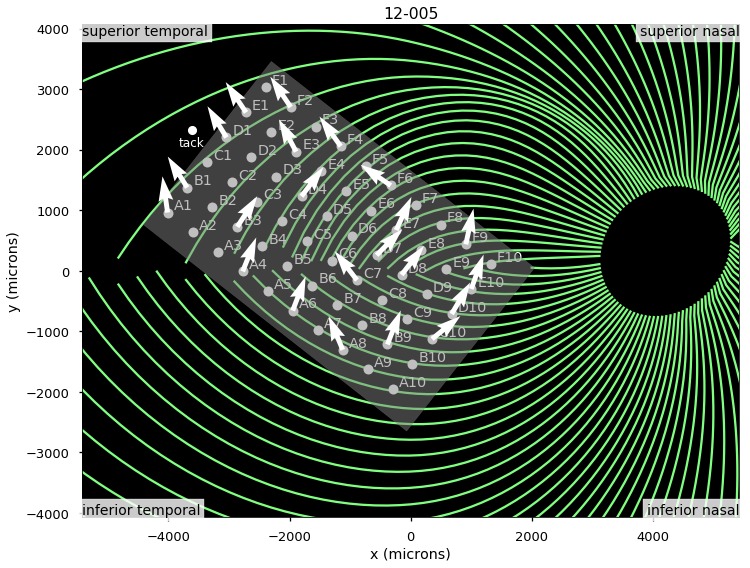

In [6]:
subject = '12-005'
fig, ax = plt.subplots(figsize=(12, 8), squeeze=True)
plot_orientation(subject, y_grouped[subject])
fig.tight_layout()

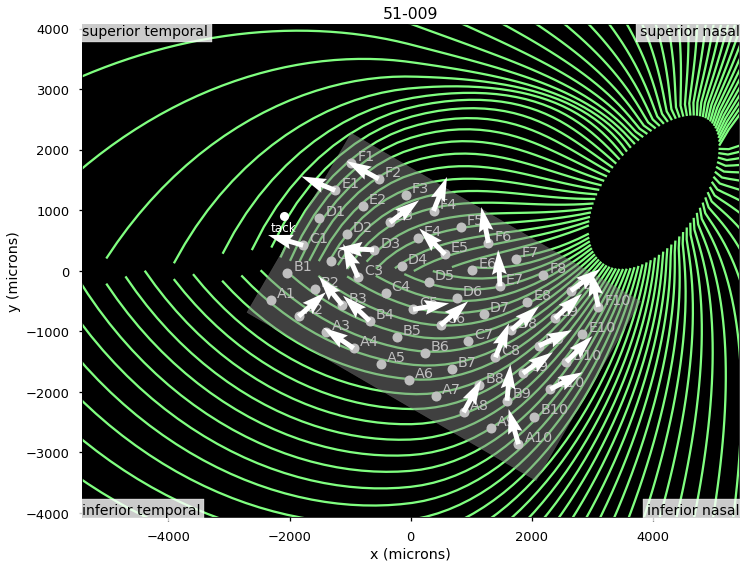

In [7]:
subject = '51-009'
fig, ax = plt.subplots(figsize=(12, 8), squeeze=True)
plot_orientation(subject, y_grouped[subject])
fig.tight_layout()

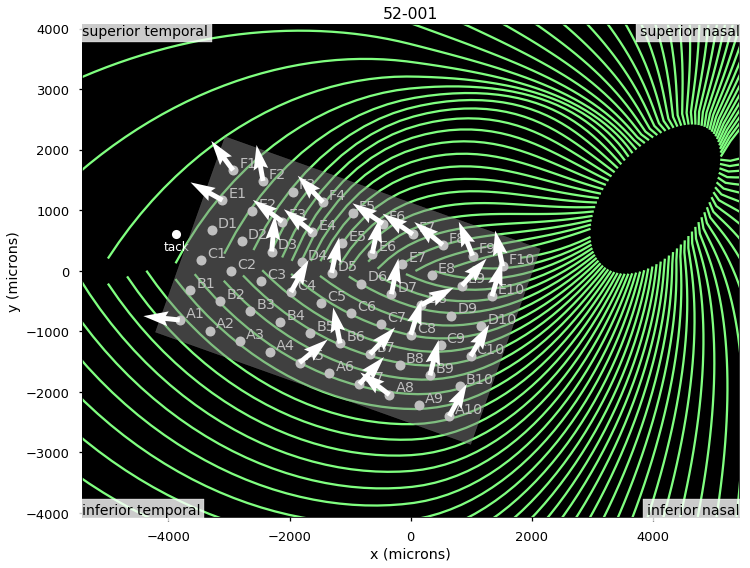

In [8]:
subject = '52-001'
fig, ax = plt.subplots(figsize=(12, 8), squeeze=True)
plot_orientation(subject, y_grouped[subject])
fig.tight_layout()